# Loading and sorting the data

Todo: 
- Provide description that we are using combination of RealmType and Enclave
- Find Ambonmalities and graph
- Find and graph missing values

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [3]:
#loading the data with pandas
df = pd.read_csv('set9_it1.csv')
df.head(1)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
0,0,100000.0,Meadowlands,Crystalhollow,1439.0,10260.0,sqft


## Cleaning data

In [5]:
# Checking for missing values
df.isna().sum()
# todo: decide what to do with the missing values 



DI                  0
TradeValue          0
RealmType           0
Enclave             0
LivingQuarters    117
ParcelSize          0
ParcelSizeUnit      0
dtype: int64

In [6]:
# removes the duplicate rows in place
df.drop_duplicates(inplace=True)

- check for issues with types
- if ParcelSizeUnit is different we need to probably drop and then convert the ParcelSize so they have the same unit

In [8]:
# todo: decide what to do with this fact
df[['ParcelSizeUnit']].squeeze().unique()

array(['sqft', 'sqm'], dtype=object)

RealType and Enclave probably have typos


In [10]:
# Aparrently not this
print(df[['RealmType']].squeeze().unique())

# here we clearly have them and some things should be done about it 
sorted(df[['Enclave']].squeeze().unique()) 

# Cleaning capitalisation 

# 

['Meadowlands' 'GnomeBurough' 'ArcaneMarket' 'AetherIsles'
 'CitadelQuarter']


['BRIGHTFORGE',
 'Brightforge',
 'Cloudrest',
 'Crystalhollow',
 'Dragonspire',
 'Dragonspires',
 'Dreamweaver',
 'Duskwood',
 'EMBERFALL',
 'Emberfall',
 'Glimmerwood',
 'MYSTVALE',
 'Moonglade',
 'Mossheart',
 'Mystvale',
 'Nighthaven',
 'Oakenshade',
 'Petalbridge',
 'Ravenstone',
 'Riverbend',
 'SHADOWMERE',
 'Shadowmere',
 'Silverglen',
 'Starfall',
 'Stormhold',
 'Stormwatch',
 'Sunspire',
 'Sunspires',
 'THORNFIELD',
 'Thornfield',
 'Verdantia',
 'Windwhisper',
 'Wolfsbane',
 'Wyverncliff',
 'dragonspire',
 'emberfall',
 'glimmerwood',
 'shadowmere',
 'silverglen',
 'thornfield',
 'wyverncliff']

# Data understanding

Finding min and max value for each numerical row

In [13]:
print("TradeValue: max: " +  str(df['TradeValue'].max()) + " min: " +  str(df['TradeValue'].min()))
print("LivingQuarters: max: " +  str(df['LivingQuarters'].max()) + " min: " +  str(df['LivingQuarters'].min()))
print("ParcelSize: max: " +  str(df['ParcelSize'].max()) + " min: " +  str(df['ParcelSize'].min()))

TradeValue: max: 755000.0 min: 113.5
LivingQuarters: max: 4339.0 min: 256.0
ParcelSize: max: 164660.0 min: -26400.0


Finding Mean, Median and mode for each row if applicable

In [15]:
# Store mean and median in variables
mean_trade_value = df["TradeValue"].mean()
median_trade_value = df["TradeValue"].median()

print("mean: ")
print(df[['TradeValue','LivingQuarters','ParcelSize']].mean())
print('\n')

print('median: ')
print(df[['TradeValue','LivingQuarters','ParcelSize']].median())
print('\n')

print("mode for numerics: ")
print(df[['TradeValue','LivingQuarters','ParcelSize']].mode().squeeze())
print('\n')
print("mode for strings: ")
print(df[['RealmType','Enclave']].mode().squeeze())


mean: 
TradeValue        181184.157291
LivingQuarters      1153.986955
ParcelSize          9826.716886
dtype: float64


median: 
TradeValue        160000.0
LivingQuarters      1110.0
ParcelSize          9328.5
dtype: float64


mode for numerics: 
TradeValue        135000.0
LivingQuarters       664.0
ParcelSize          9600.0
Name: 0, dtype: float64


mode for strings: 
RealmType    Meadowlands
Enclave      Dragonspire
Name: 0, dtype: object


Distributions

- Calculate Variance
- Show the distirution using a bell cerve graph 
- Comment and show on the graph skewedness of the distribution


Outliers

- Detect Outliers by highlighing area on a histogram
- Detect Outliers by comparing it to 3 times the stardard devation 
- Detect Outliers by using 1.5 * IQR also put a box graph for this one so it's visual as well 
- After all that decide what to do with the outliers and provide reasons 

Scatter Graphs


- Create scatter graph to see colleration between LivingQuarters (X) and TradeValue (Y)
- Create scatter graph to see colleration between ParcelSize (X) and TradeValue  (Y)
- Describe each graph's trends


Create scatter graph to see colleration between LivingQuarters (X) and TradeValue (Y)
Create scatter graph to see colleration between ParcelSize (X) and TradeValue (Y)
Describe each graph s trends

### Benchmark model

To Do:
- Calculate the mean or median of TradeValue
-  Split into Train and Testing sets 
- Calculate the MAE metric and MSE based on that  

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data into Training (80%) and Testing (20%)
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

# Assign the benchmark prediction using median
test_set["BenchmarkPrediction"] = median_trade_value

#Evaluate the model
mae = mean_absolute_error(test_set["TradeValue"], test_set["BenchmarkPrediction"])
mse = mean_squared_error(test_set["TradeValue"], test_set["BenchmarkPrediction"])

#Print Evaluation Metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


Mean Absolute Error (MAE): 57978.142818376065
Mean Squared Error (MSE): 7209555660.26015


### Visualizing Training & Testing Split

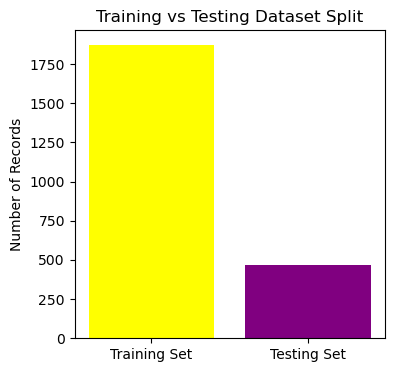

In [37]:
# Define dataset sizes
sizes = [train_set.shape[0], test_set.shape[0]]
labels = ["Training Set", "Testing Set"]

# Plot the dataset split
plt.figure(figsize=(4,4))
plt.bar(labels, sizes, color=['yellow', 'purple'])
plt.ylabel("Number of Records")
plt.title("Training vs Testing Dataset Split")
plt.show()

### Visualizing Benchmark Predictions vs Actual Trade Values

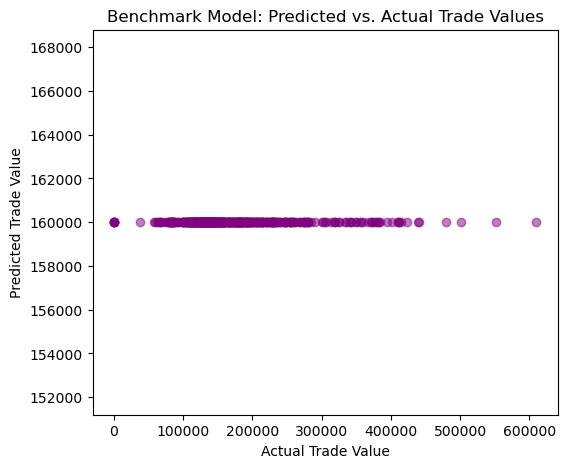

In [40]:
# Scatter plot of actual vs predicted trade values
plt.figure(figsize=(6,5))
plt.scatter(test_set["TradeValue"], test_set["BenchmarkPrediction"], alpha=0.5, color="purple")
plt.xlabel("Actual Trade Value")
plt.ylabel("Predicted Trade Value")
plt.title("Benchmark Model: Predicted vs. Actual Trade Values")
plt.show()

### Visualizing Error Distribution (MAE)

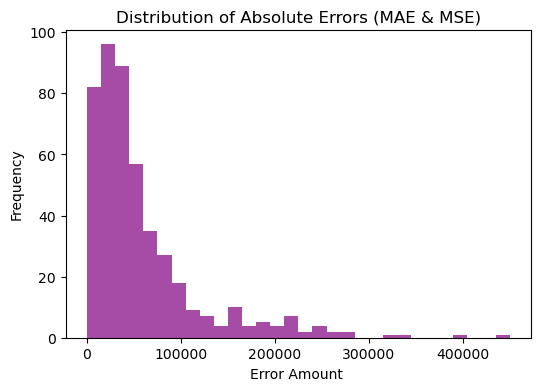

In [77]:
# Calculate absolute errors
errors = abs(test_set["TradeValue"] - test_set["BenchmarkPrediction"])

# Plot histogram
plt.figure(figsize=(6,4))
plt.hist(errors, bins=30, color="purple", alpha=0.7)
plt.xlabel("Error Amount ")
plt.ylabel("Frequency")
plt.title("Distribution of Absolute Errors (MAE & MSE)")
plt.show()

### Box Plot for Outlier Detection

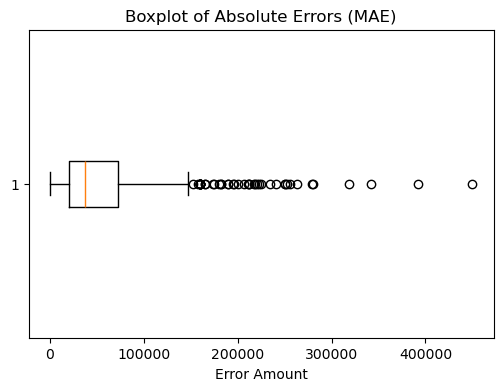

In [80]:
# Box plot of errors
plt.figure(figsize=(6,4))
plt.boxplot(errors, vert=False)
plt.xlabel("Error Amount")
plt.title("Boxplot of Absolute Errors (MAE)")
plt.show()

### Visualize Mean vs. Median for Decision

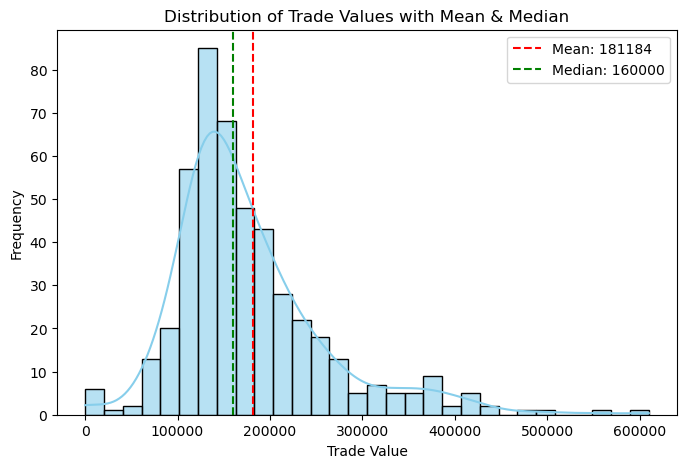

In [83]:
# Plot histogram with mean and median
plt.figure(figsize=(8,5))
sns.histplot(test_set["TradeValue"], bins=30, kde=True, color="skyblue", alpha=0.6)
plt.axvline(mean_trade_value, color="red", linestyle="dashed", label=f"Mean: {int(mean_trade_value)}")
plt.axvline(median_trade_value, color="green", linestyle="dashed", label=f"Median: {int(median_trade_value)}")
plt.legend()
plt.xlabel("Trade Value")
plt.ylabel("Frequency")
plt.title("Distribution of Trade Values with Mean & Median")
plt.show()